In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from fbprophet import Prophet

In [2]:
# 출력 옵션 변경

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 9000)

In [3]:
dlvr = pd.read_csv('../data/dlvr_call.csv');

C:\Users\Jeaung-Lee\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# dlvr[시간, 주문상태] 컬럼 선택

df_dlvr = dlvr[['PROCESS_DT', 'DLVR_REQUST_STTUS_VALUE']]

In [5]:
# 배달 상태가 완료인 행만 추출

df_dlvr = df_dlvr[df_dlvr.DLVR_REQUST_STTUS_VALUE == 1]

In [6]:
# 배달접수시간, 배달수령시간 결측치 행 삭제

df_dlvr = df_dlvr[df_dlvr.PROCESS_DT != '\\N']
df_dlvr = df_dlvr[df_dlvr.DLVR_REQUST_STTUS_VALUE != '\\N']

In [7]:
df_dlvr['PROCESS_DT'] = pd.to_datetime(df_dlvr['PROCESS_DT'])

In [8]:
df_dlvr = pd.DataFrame(df_dlvr.groupby('PROCESS_DT', sort=True).sum())

In [9]:
df_dlvr.reset_index(drop=False, inplace=True)

In [10]:
df_dlvr.columns = ['day', 'call']

In [11]:
df_dlvr['day'] = pd.to_datetime(df_dlvr['day'])
df_dlvr

,day,call
0,2019-12-01,9501
1,2019-12-02,14101
2,2019-12-03,15574
3,2019-12-04,15579
4,2019-12-05,17096
5,2019-12-06,20388
6,2019-12-07,24003
7,2019-12-08,24805
8,2019-12-09,16423
9,2019-12-10,16968


In [12]:
df_dlvr.index = df_dlvr['day']
df_dlvr.set_index('day', inplace=True)

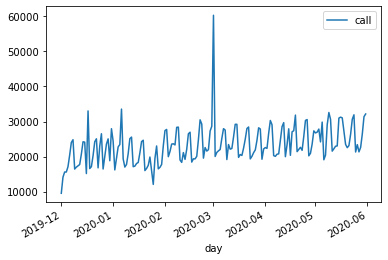

In [13]:
df_dlvr.plot()
plt.show()

In [14]:
# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(df_dlvr.call.values, order=(2,0,2))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c', full_output=True, disp=True, transparams = False)
print(model_fit.summary())

C:\Users\Jeaung-Lee\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Jeaung-Lee\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:880: RuntimeWarning: invalid value encountered in double_scalars
  llf = -nobs

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  182
Model:                     ARMA(2, 2)   Log Likelihood               -1821.823
Method:                       css-mle   S.D. of innovations                nan
Date:                Mon, 16 Aug 2021   AIC                           3655.645
Time:                        20:16:37   BIC                           3674.869
Sample:                             0   HQIC                          3663.438
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.529e+04    526.953     47.993      0.000    2.43e+04    2.63e+04
ar.L1.y        1.2329      0.188      6.544      0.000       0.864       1.602
ar.L2.y       -0.2614      0.190     -1.376      0.1

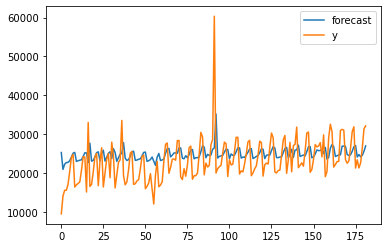

In [15]:
fig = model_fit.plot_predict()


<AxesSubplot:>

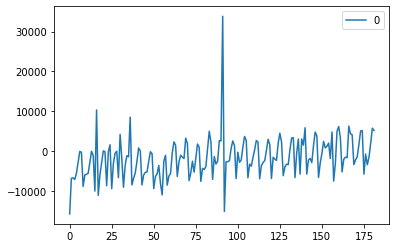

In [16]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

In [17]:
forecast_data = model_fit.forecast(steps=5)

In [18]:
df_dlvr_test = df_dlvr[177:]

In [19]:
# 마지막 5일의 예측 데이터 (2021-04-15 ~ 2021-04-19)
pred_y = forecast_data[0].tolist()

# 실제 5일의 데이터 (2021-04-15 ~ 2021-04-19)
test_y = df_dlvr_test.call.values

# 마지막 5일의 예측 데이터 최소값
pred_y_lower = []
# 마지막 5일의 예측 데이터 최대값
pred_y_upper = []

for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

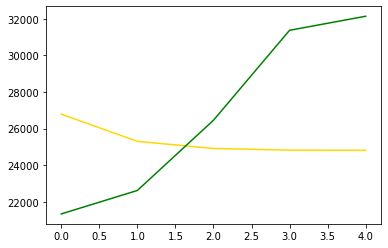

In [20]:
# 모델이 예측한 가격 그래프
plt.plot(pred_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

# fbprophet

In [42]:
df_dlvr_pro = df_dlvr.reset_index(drop=False, inplace=False)

In [43]:
df_dlvr_pro.columns = ['ds', 'y']

In [44]:
df_dlvr_pro

,ds,y
0,2019-12-01,9501
1,2019-12-02,14101
2,2019-12-03,15574
3,2019-12-04,15579
4,2019-12-05,17096
5,2019-12-06,20388
6,2019-12-07,24003
7,2019-12-08,24805
8,2019-12-09,16423
9,2019-12-10,16968


In [45]:
prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality=True, 
                 weekly_seasonality=True,
                 daily_seasonality=True,
                 changepoint_prior_scale=0.5)

prophet.fit(df_dlvr_pro)

In [46]:
future_data = prophet.make_future_dataframe(periods = 5, freq = 'd')
forecast_data = prophet.predict(future_data)
forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
182,2020-06-01,21452.248694,17865.399320,24897.503798
183,2020-06-02,23440.003066,19376.071873,27239.740897
184,2020-06-03,22942.059535,19222.259165,26514.976452
185,2020-06-04,22822.307454,18732.960030,27281.353389
186,2020-06-05,26657.648159,22288.062722,30871.311355


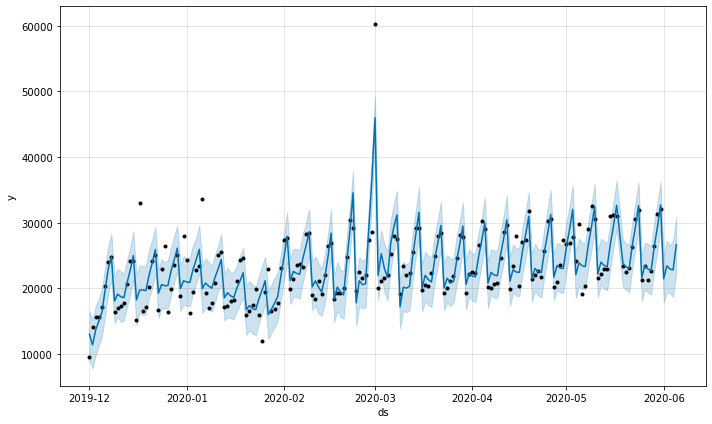

In [47]:
fig1 = prophet.plot(forecast_data)

C:\Users\Jeaung-Lee\anaconda3\lib\site-packages\fbprophet\plot.py:413: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
C:\Users\Jeaung-Lee\anaconda3\lib\site-packages\fbprophet\plot.py:413: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
C:\Users\Jeaung-Lee\anaconda3\lib\site-packages\fbprophet\plot.py:413: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


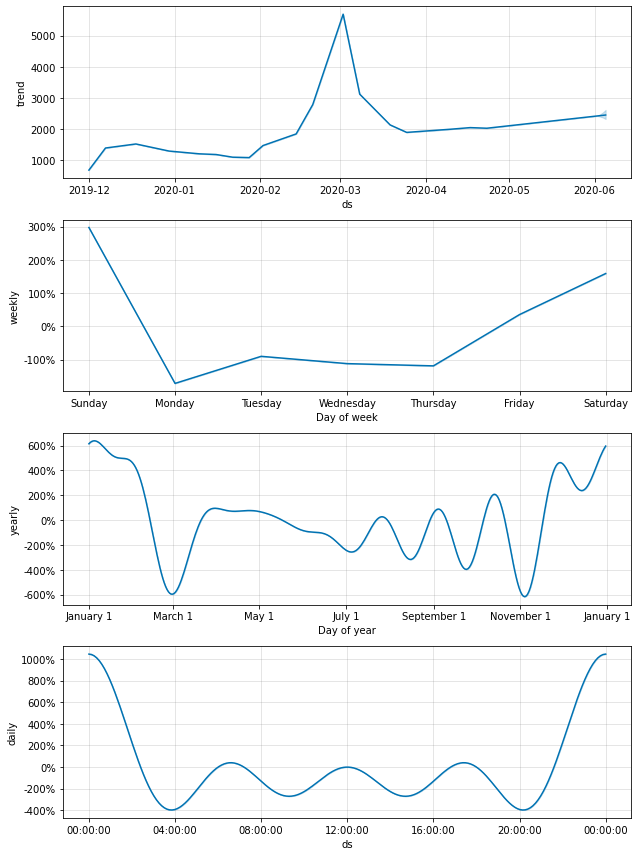

In [48]:
fig2 = prophet.plot_components(forecast_data)

In [74]:
df_dlvr_test = df_dlvr_pro[-5:]

# 마지막 5일의 예측 데이터 (2021-04-15 ~ 2021-04-19)
pred_y = forecast_data.yhat.values[-5:]

# 실제 5일의 데이터 (2021-04-15 ~ 2021-04-19)
test_y = df_dlvr_test.y.values

# 마지막 5일의 예측 데이터 최소값
pred_y_lower = forecast_data.yhat_lower.values[-5:]
# 마지막 5일의 예측 데이터 최대값
pred_y_upper = forecast_data.yhat_upper.values[-5:]

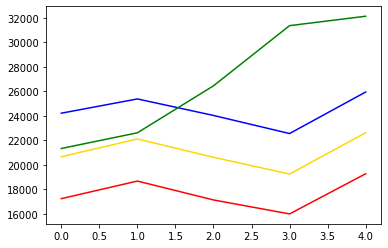

In [75]:
# 모델이 예측한 가격 그래프
plt.plot(pred_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

In [52]:
# 이상치 제거

df_dlvr_pro.loc[df_dlvr_pro['y'] > 35000, 'y'] = 35000
df_dlvr_pro

,ds,y
0,2019-12-01,9501
1,2019-12-02,14101
2,2019-12-03,15574
3,2019-12-04,15579
4,2019-12-05,17096
5,2019-12-06,20388
6,2019-12-07,24003
7,2019-12-08,24805
8,2019-12-09,16423
9,2019-12-10,16968


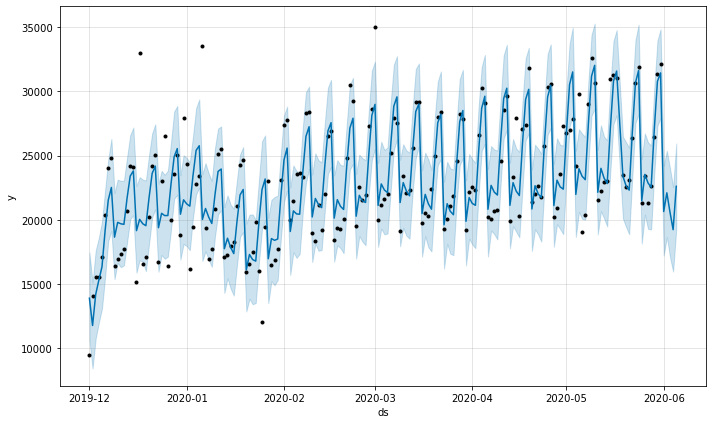

In [53]:
# prophet 모델 학습
prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality = True,
                 weekly_seasonality = True,
                 daily_seasonality = True,
                 changepoint_prior_scale = 0.5)

prophet.fit(df_dlvr_pro)

# 5일 예측 
future_data = prophet.make_future_dataframe(periods = 5, freq = 'd')

forecast_data = prophet.predict(future_data)
fig = prophet.plot(forecast_data)

C:\Users\Jeaung-Lee\anaconda3\lib\site-packages\fbprophet\plot.py:413: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
C:\Users\Jeaung-Lee\anaconda3\lib\site-packages\fbprophet\plot.py:413: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
C:\Users\Jeaung-Lee\anaconda3\lib\site-packages\fbprophet\plot.py:413: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


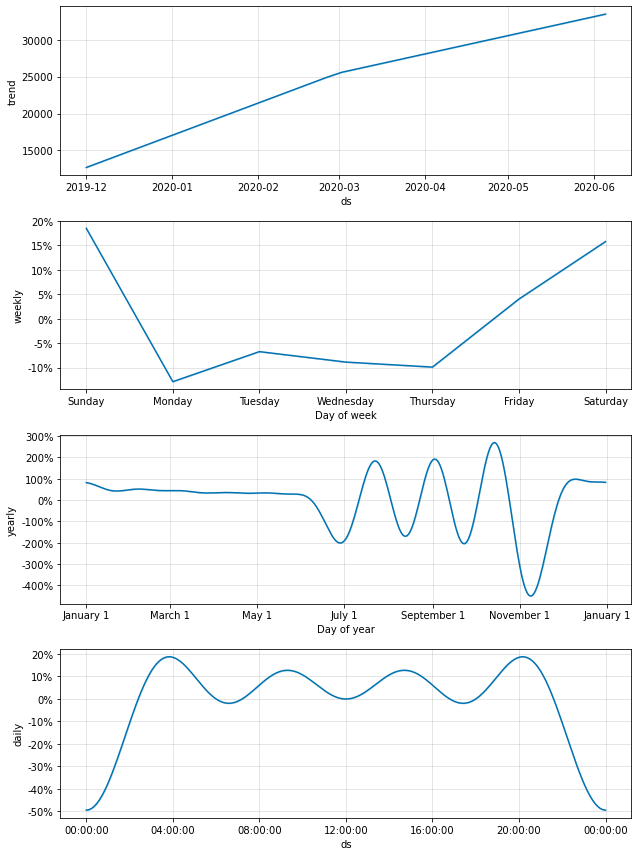

In [54]:
fig2 = prophet.plot_components(forecast_data)

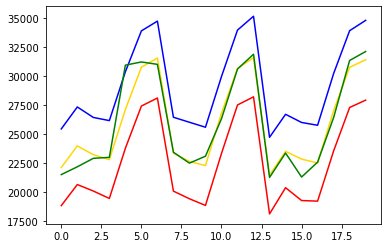

In [83]:
df_dlvr_test = df_dlvr_pro[-20:]

# 마지막 5일의 예측 데이터 (2021-04-15 ~ 2021-04-19)
pred_y = forecast_data.yhat.values[-25:-5]

# 실제 5일의 데이터 (2021-04-15 ~ 2021-04-19)
test_y = df_dlvr_test.y.values

# 마지막 5일의 예측 데이터 최소값
pred_y_lower = forecast_data.yhat_lower.values[-25:-5]
# 마지막 5일의 예측 데이터 최대값
pred_y_upper = forecast_data.yhat_upper.values[-25:-5]

# 모델이 예측한 가격 그래프
plt.plot(pred_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

In [101]:
pred_sr = pd.Series(pred_y.tolist())
pred_upper_sr = pd.Series(pred_y_lower.tolist())
pred_lower_sr = pd.Series(pred_y_upper.tolist())

In [102]:
df_dlvr_pred = df_dlvr_test.reset_index(drop=False, inplace=False)

In [103]:
df_dlvr_pred = pd.concat([df_dlvr_pred,pred_seri,pred_upper_sr,pred_lower_sr],axis=1,ignore_index=True)


In [111]:
df_dlvr_pred.drop(df_dlvr_pred.columns[0], axis=1, inplace=True)

In [112]:
df_dlvr_pred.columns = ['date', 'actual', 'predict', 'lower', 'upper']

In [113]:
df_dlvr_pred

,date,actual,predict,lower,upper
0,2020-05-11,21542,22151.585894,18868.306336,25477.957935
1,2020-05-12,22213,24014.900609,20683.398733,27368.595270
2,2020-05-13,22944,23255.007507,20124.759227,26467.218589
3,2020-05-14,23027,22831.892741,19487.156497,26193.909313
4,2020-05-15,30972,27147.673074,23808.388132,30400.671318
5,2020-05-16,31248,30794.162335,27448.592370,33926.289065
6,2020-05-17,31041,31584.633909,28140.930883,34765.848339
7,2020-05-19,23466,23393.109458,20116.624929,26482.342617
8,2020-05-20,22529,22665.596750,19456.740488,26050.886768
9,2020-05-21,23126,22317.946557,18884.094067,25622.725987


In [114]:
df_dlvr_pred.to_csv('../data/fbprophet.csv', index=False)